In [1]:
import tensorflow as tf
tf.__version__

'1.4.0'

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.2'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from matplotlib.pyplot import imread

In [5]:
from random import shuffle, random
import cv2
from skimage import exposure
from tqdm import tqdm

In [6]:
from preprocess import *

In [7]:
data_dir = 'data/data2'

In [8]:
colnames = ['center_img', 'left_img', 'right_img', 'steering_angle', 'throttle', 'break', 'speed']
driving_log_pd = pd.read_csv('%s/driving_log.csv' % data_dir, sep=',', 
                            names=colnames)
driving_log_pd.loc[:100]

,center_img,left_img,right_img,steering_angle,throttle,break,speed
0,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,0.000000,0.000000,0.000000,5.544637
1,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,0.000000,0.000000,0.000000,5.489003
2,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,0.000000,0.000000,0.000000,5.433926
3,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,0.000000,0.000000,0.000000,5.390263
4,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,0.000000,0.000000,0.000000,5.336177
5,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,0.000000,0.000000,0.000000,5.303978
6,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,0.000000,0.000000,0.000000,5.261351
7,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,0.000000,0.000000,0.000000,5.208557
8,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,0.000000,0.000000,0.000000,5.145902
9,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,/Users/phillipcchin/work/CarND-Behavioral-Clon...,-0.150000,0.000000,0.000000,5.100726


In [9]:
def parse_file_name(full_path):
    if '/' in full_path:
        return full_path.split('/')[-1]
    else:
        return full_path

In [10]:
for colname in ['center_img', 'left_img', 'right_img']:
    driving_log_pd[colname] = [parse_file_name(x) for x in driving_log_pd[colname].tolist()]

driving_log_pd.head()

,center_img,left_img,right_img,steering_angle,throttle,break,speed
0,center_2018_01_22_19_22_53_312.jpg,left_2018_01_22_19_22_53_312.jpg,right_2018_01_22_19_22_53_312.jpg,0.0,0.0,0.0,5.544637
1,center_2018_01_22_19_22_53_419.jpg,left_2018_01_22_19_22_53_419.jpg,right_2018_01_22_19_22_53_419.jpg,0.0,0.0,0.0,5.489003
2,center_2018_01_22_19_22_53_517.jpg,left_2018_01_22_19_22_53_517.jpg,right_2018_01_22_19_22_53_517.jpg,0.0,0.0,0.0,5.433926
3,center_2018_01_22_19_22_53_589.jpg,left_2018_01_22_19_22_53_589.jpg,right_2018_01_22_19_22_53_589.jpg,0.0,0.0,0.0,5.390263
4,center_2018_01_22_19_22_53_690.jpg,left_2018_01_22_19_22_53_690.jpg,right_2018_01_22_19_22_53_690.jpg,0.0,0.0,0.0,5.336177


In [11]:
def display_images(X, start_idx=0, end_idx=None,  columns = 5, use_gray=False, 
                   apply_fnc=None, figsize=(32,18)):
    if end_idx is None:
        end_idx = X.shape[0]
        
    if apply_fnc is None:
        apply_fnc = lambda image: image
        
    plt.figure(figsize=figsize)

    num_of_images = end_idx - start_idx
    rows = num_of_images / columns + 1
    
    for i in range(start_idx, end_idx):
        image = X[i]
        
        _i = i % num_of_images
        plt.subplot(rows, columns, _i + 1)
        
        if use_gray:
            plt.imshow(apply_fnc(image), cmap="gray")
        else:
            plt.imshow(apply_fnc(image)) 
            
    plt.tight_layout()
            
    plt.show()

In [12]:
img_dir = '%s/IMG' % data_dir

In [13]:
def read_imgs(img_dir, file_names):
    img_arr = []
    
    for file_name in file_names:
        img = imread('%s/%s' % (img_dir, file_name))
        img_arr.append(img)
        
    return np.stack(img_arr)

In [14]:
sample_imgs = read_imgs(img_dir, driving_log_pd['center_img'].tolist()[:10])
sample_imgs.shape

(10, 160, 320, 3)

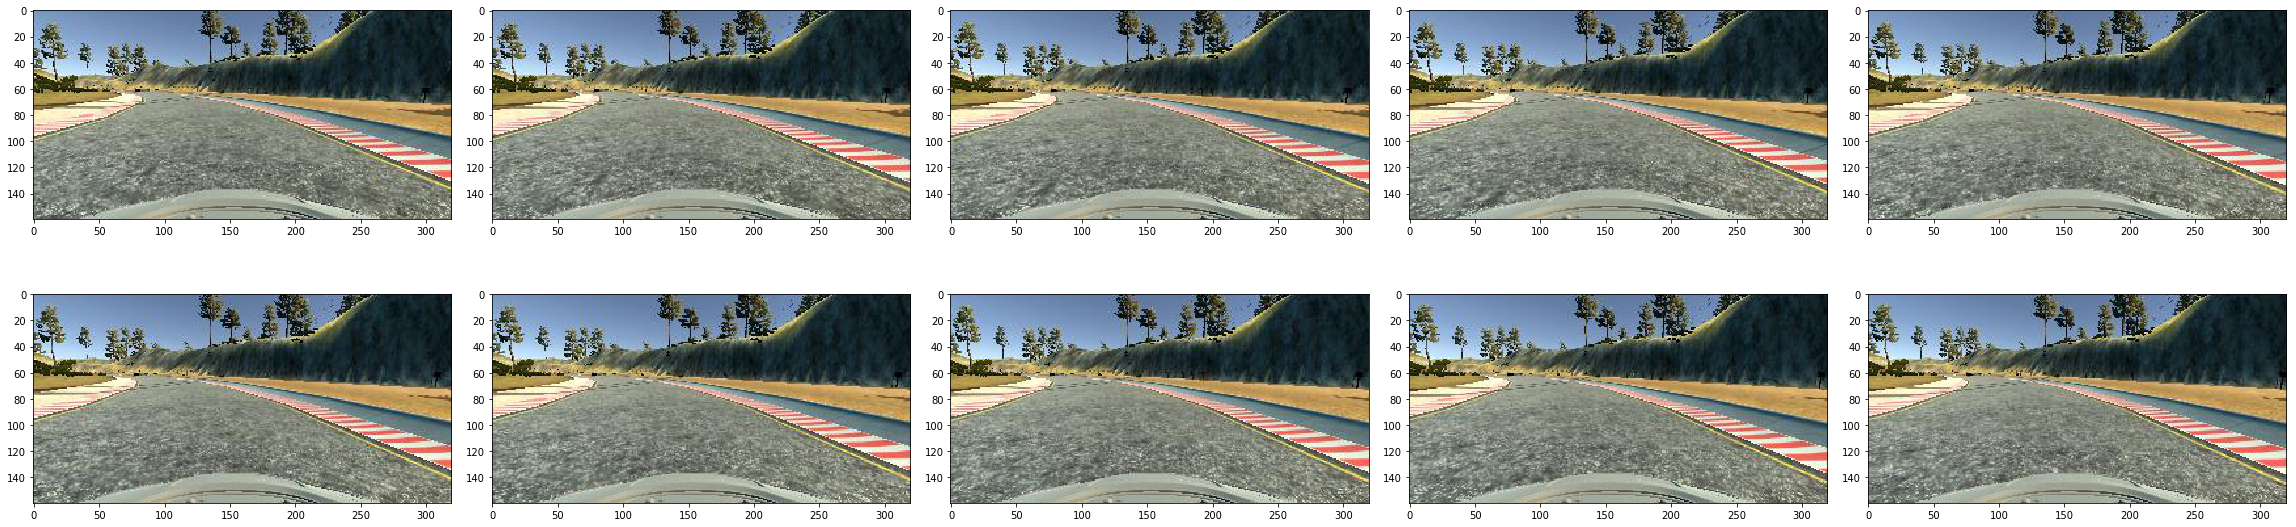

In [15]:
display_images(sample_imgs, columns=5, figsize=(32,12))

In [16]:
img_steering_pd = driving_log_pd[['center_img', 'steering_angle']]

In [17]:
img_steering_pd.head()

,center_img,steering_angle
0,center_2018_01_22_19_22_53_312.jpg,0.0
1,center_2018_01_22_19_22_53_419.jpg,0.0
2,center_2018_01_22_19_22_53_517.jpg,0.0
3,center_2018_01_22_19_22_53_589.jpg,0.0
4,center_2018_01_22_19_22_53_690.jpg,0.0


In [22]:
def get_perc_red(img):
    return img[0].sum()/(img.shape[0]*img.shape[1])

In [28]:
type(img_steering_pd.iloc[0]['center_img'])

str

In [54]:
get_perc_red(sample_imgs[0])

1.9932421874999999

In [34]:
perc_red_arr = []

for i in tqdm(range(len(img_steering_pd.index))):
    img_name = img_steering_pd.iloc[i]['center_img']
    img = read_imgs(img_dir, [img_name])[0]
    perc_red = get_perc_red(img)
    
    perc_red_arr.append(perc_red)
    
perc_red_arr[:10]

100%|██████████| 18644/18644 [02:14<00:00, 138.75it/s]


[1.9932421874999999,
 2.0165429687500001,
 1.9882031250000001,
 1.97701171875,
 1.99287109375,
 1.9957617187500001,
 1.99736328125,
 1.9805273437499999,
 1.9815429687499999,
 1.9745507812500001]

In [37]:
_img_steering_pd = img_steering_pd.copy()

In [38]:
_img_steering_pd['perc_red'] = perc_red_arr
_img_steering_pd.head()

,center_img,steering_angle,perc_red
0,center_2018_01_22_19_22_53_312.jpg,0.0,1.993242
1,center_2018_01_22_19_22_53_419.jpg,0.0,2.016543
2,center_2018_01_22_19_22_53_517.jpg,0.0,1.988203
3,center_2018_01_22_19_22_53_589.jpg,0.0,1.977012
4,center_2018_01_22_19_22_53_690.jpg,0.0,1.992871


In [40]:
_img_steering_pd['perc_red'].min(), _img_steering_pd['perc_red'].max(), _img_steering_pd['perc_red'].mean()

(1.7859570312499999, 3.203125, 2.5136377875003353)

In [52]:
same_red_imgs = _img_steering_pd[_img_steering_pd['perc_red'] > 3.1].iloc[:10]['center_img'].tolist()

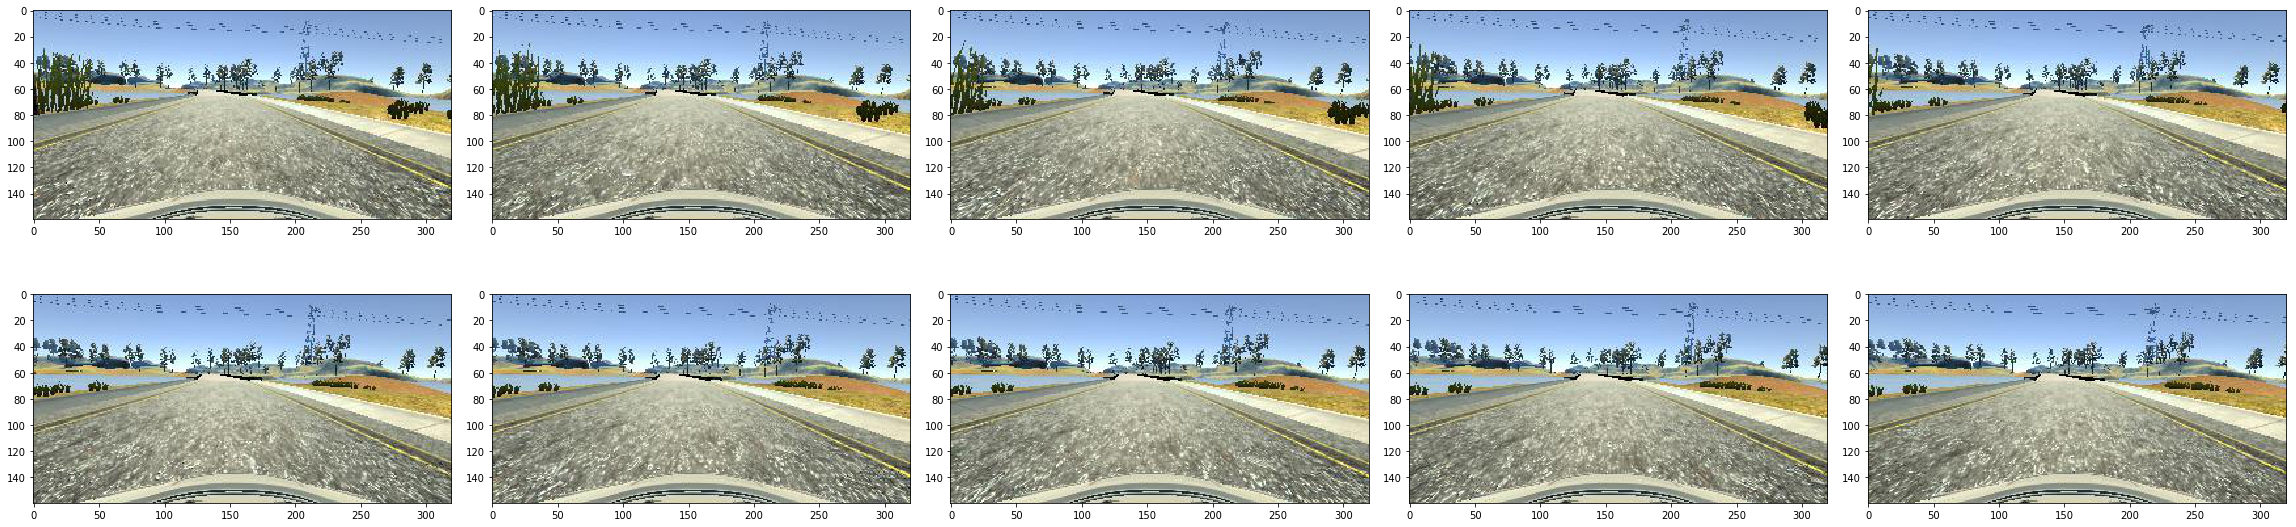

In [53]:
display_images(read_imgs(img_dir, same_red_imgs), columns=5, figsize=(32,12))